In [1]:
import pandas as pd
import matplotlib.pyplot as plt

dfs = {}

2023-09-20 16:25:18,091 - DEBUG - pffrocd config: {
    "client": {
        "ip_address": "192.168.5.111",
        "username": "kamil",
        "private_ssh_key_path": "/home/dietpi/.ssh/id_rsa",
        "executable_path": "/home/kamil/pffrocd/ABY/build/bin",
        "executable_name": "cos_dist_float_scen_simd",
        "pffrocd_path": "/home/kamil/pffrocd"
    },
    "server": {
        "ip_address": "192.168.5.112",
        "username": "kamil",
        "private_ssh_key_path": "/home/dietpi/.ssh/id_rsa",
        "executable_path": "/home/kamil/pffrocd/ABY/build/bin",
        "executable_name": "cos_dist_float_scen_simd",
        "pffrocd_path": "/home/kamil/pffrocd"
    },
    "misc": {
        "nr_of_people": "1500",
        "security_level": "128",
        "mt_algorithm": "2",
        "niceness": "-20",
        "starting_person": "20",
        "bit_length": "32",
        "gather_energy_data": "0"
    }
}
2023-09-20 16:25:34,277 - INFO - Bandwidth: 929.34 Mbits/sec

SFE TIME STATIST

<Axes: >

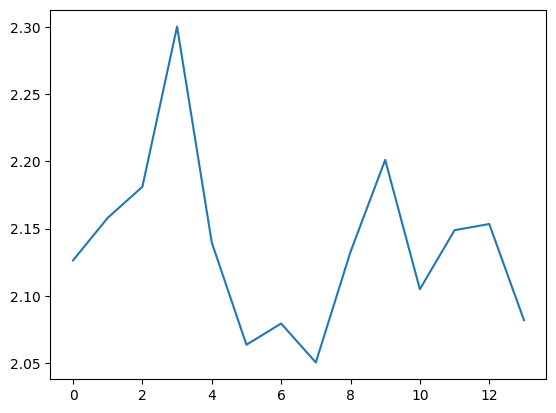

In [2]:
# inspect configuration of a given dfs
NAME = '2023-09-20_16-25-18'

with open(f"../log/debug_{NAME}.log") as input_file:
    head = [next(input_file) for _ in range(28)]
print(''.join(head))

df_inspecting = pd.read_csv(f"../dfs/{NAME}.csv")
print("SFE TIME STATISTICS")
print((df_inspecting['server.timings.total'] / 1000).describe())
(df_inspecting['server.timings.total'] / 1000).plot()

In [3]:
# accumulate all results
dfs['OT_80'] = pd.read_csv("../dfs/2023-09-20_15-17-42.csv")
dfs['OT_112'] = pd.read_csv("../dfs/2023-09-20_15-24-44.csv")
dfs['OT_128'] = pd.read_csv("../dfs/2023-09-20_15-42-42.csv")

dfs['DGK_80'] = pd.read_csv("../dfs/2023-09-20_16-09-36.csv")
dfs['DGK_112'] = pd.read_csv("../dfs/2023-09-20_16-18-21.csv")
dfs['DGK_128'] = pd.read_csv("../dfs/2023-09-20_16-25-18.csv")

dfs['PAILLIER_80'] = pd.read_csv("../dfs/2023-09-20_15-47-59.csv")
dfs['PAILLIER_112'] = pd.read_csv("../dfs/2023-09-20_15-53-00.csv")
dfs['PAILLIER_128'] = pd.read_csv("../dfs/2023-09-20_16-00-05.csv").drop(19)

In [4]:
# prepare labels
labels = ["sec_level: 80\nMT: OT",
          "sec_level: 112\nMT: OT",
          "sec_level: 128\nMT: OT",
          "sec_level: 80\nMT: DGK",
          "sec_level: 112\nMT: DGK",
          "sec_level: 128\nMT: DGK",
          "sec_level: 80\nMT: Paillier",
          "sec_level: 112\nMT: Paillier",
          "sec_level: 128\nMT: Paillier"
          ]
for i, k in enumerate(dfs):
    labels[i] += f'\n N = {len(dfs[k])}'

Text(0.5, 0, 'Configuration')

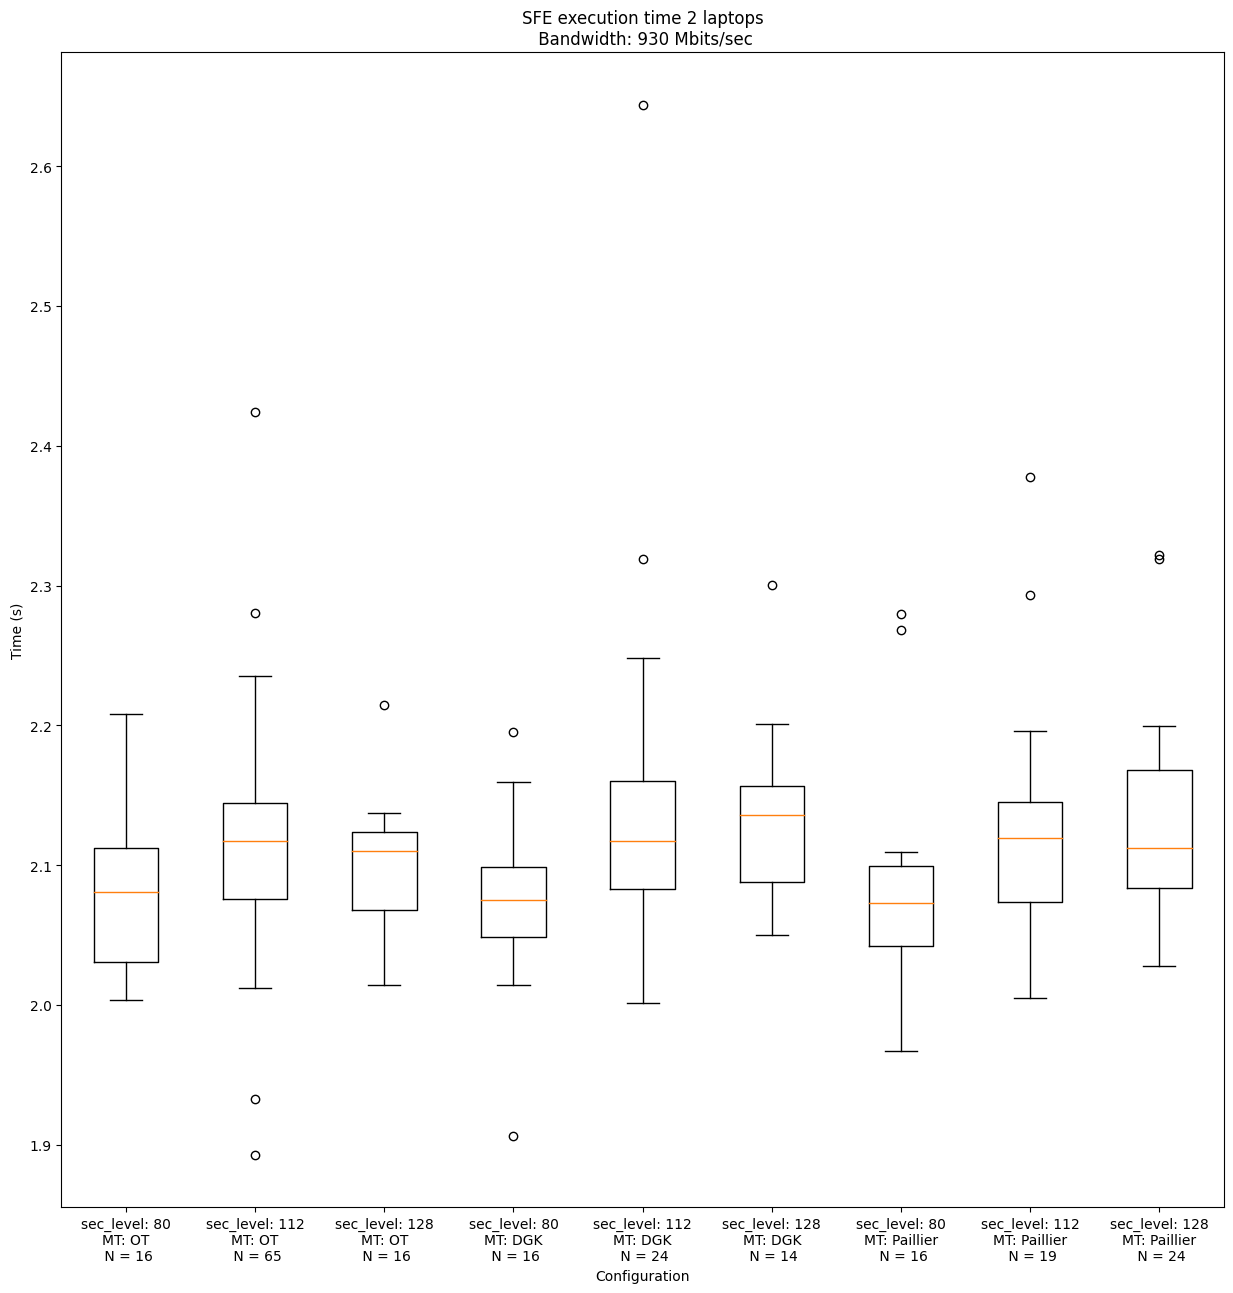

In [6]:
# plotting




plt.rcParams['figure.figsize'] = [15, 15]  # default hor./vert. size of plots, in inches
plt.xticks(rotation=0)
ax = plt.boxplot([df['server.timings.total'] / 1000 for df in dfs.values()], labels=labels)
plt.title("SFE execution time 2 laptops\n Bandwidth: 930 Mbits/sec")
plt.ylabel("Time (s)")
plt.xlabel("Configuration")